In [99]:
S|import urllib.request          as     url
import pandas                  as     pd
from   sklearn                 import tree
import graphviz                as     gv
import numpy                   as     np
from   sklearn.metrics         import accuracy_score
from   sklearn.model_selection import train_test_split
from   sklearn.ensemble        import BaggingClassifier,RandomForestClassifier
import matplotlib.pylab        as     plt 
from   sklearn.model_selection import GridSearchCV
import sklearn
from   graphviz                 import Digraph

In [81]:
import pandas as pd
data=pd.read_csv(r"C:\Users\PROPIETARIO.ACER\Downloads\sonar.csv")
data.shape
data.head(4)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Y
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R


In [87]:
y=LabelEncoder().fit_transform(data[["Y"]])
X=data.drop(['Y'],axis=1)
X.head(3)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [101]:
pip install graphviz

In [102]:
#ccp_alpha= 0.015 agregar para mejorar la clasificacion
tr=tree.DecisionTreeClassifier(criterion="gini",max_depth=7,max_leaf_nodes=7)
trf=tr.fit(X_train,y_train)

In [103]:
dot_data = tree.export_graphviz(trf, out_file=None,
                     feature_names=X_train.columns,  
                     
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = gv.Source(dot_data)  
graph

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [104]:
col=["Y"]
def stringIndexer(data,col):
    X=data
    for i in col:
        X[i+"strindexer"]=LabelEncoder().fit_transform(X[i]) 
        X=X.drop(i,1)
    return X

In [107]:
yp=trf.predict(X_test)
print('Porcentaje de datos bien clasificados')
print(accuracy_score(y_test,yp))
print('número de datos bien clasificados')
accuracy_score(y_test,yp,normalize=False)

Porcentaje de datos bien clasificados
0.6349206349206349
número de datos bien clasificados


40

In [110]:
param_grid = {
    'max_depth' : [4,5,6,7,8,9,10,11],
    'max_leaf_nodes' : [i for i in range(5,25,1)],
    'criterion':["gini", "entropy"]
}
model = GridSearchCV(tree.DecisionTreeClassifier(),param_grid, scoring = 'accuracy')
model.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                            15, 16, 17, 18, 19, 20, 21, 22, 23,
                                            24]},
             scoring='accuracy')

In [111]:
print("model score: %.3f" % model.score(X_test, y_test))
print ("hiperparametros: ",str(model.best_params_))

model score: 0.667
hiperparametros:  {'criterion': 'entropy', 'max_depth': 8, 'max_leaf_nodes': 22}


In [112]:
path = tr.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Impureza vs effective alpha')

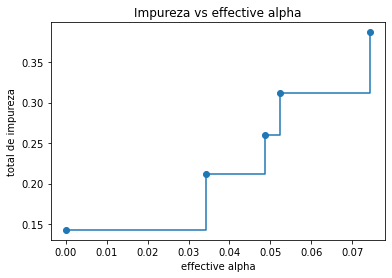

In [113]:

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total de impureza")
ax.set_title("Impureza vs effective alpha")

In [115]:
models = []
for ccp_alpha in ccp_alphas:
    mod = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    mod.fit(X_train, y_train)
    models.append(mod)
print("Numero de nodos en el ultimo arbol es: {} con ccp_alpha: {}".format(
      models[-1].tree_.node_count, ccp_alphas[-1]))

Numero de nodos en el ultimo arbol es: 1 con ccp_alpha: 0.11306714730003564


In [117]:
models = models[:-1]
ccp_alphas = ccp_alphas[:-1]

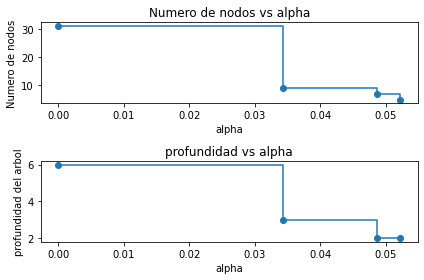

In [118]:
node_counts = [mod.tree_.node_count for mod in models]
depth = [mod.tree_.max_depth for mod in models]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("Numero de nodos")
ax[0].set_title("Numero de nodos vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("profundidad del arbol")
ax[1].set_title("profundidad vs alpha")
fig.tight_layout()


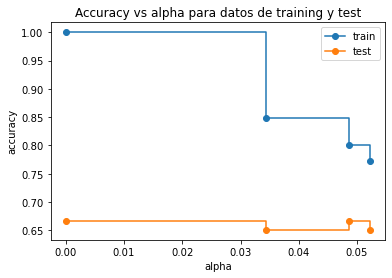

In [119]:
train_scores = [mod.score(X_train, y_train) for mod in models]
test_scores = [mod.score(X_test, y_test) for mod in models]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha para datos de training y test")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [120]:
randomForest = RandomForestClassifier(max_depth=7,n_estimators=100, random_state=0)
randomForest.fit(X_train, y_train)
y_forest=randomForest.predict(X_test)

In [121]:
print('número de datos bien clasificados')
accuracy_score(y_test,y_forest,normalize=False)

número de datos bien clasificados


51

Ajustamos un modelo de BAGGING

In [129]:
seed=7
cart=tree.DecisionTreeClassifier(max_depth=7)
n_trees=62
baggingModel=BaggingClassifier(base_estimator=cart,n_estimators=n_trees,random_state=seed)
baggingModel.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7),
                  n_estimators=62, random_state=7)

In [130]:
y_bag=baggingModel.predict(X_test)
print('Porcentaje de datos bien clasificados')
print(accuracy_score(y_test,y_bag))
print('número de datos bien clasificados')
accuracy_score(y_test,y_bag,normalize=False)

Porcentaje de datos bien clasificados
0.7619047619047619
número de datos bien clasificados


48

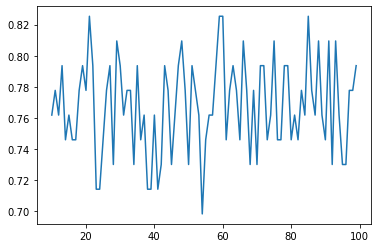

In [131]:
trees=[i for i in range(10,100,1)]
max_dept=[4,5,7,9]
ac=[]
for i in trees:
    cart=tree.DecisionTreeClassifier(max_depth=7)
    baggingModel=BaggingClassifier(base_estimator=cart,n_estimators=i)
    baggingModel.fit(X_train,y_train)
    y_bag=baggingModel.predict(X_test)
    ac.append(accuracy_score(y_test,y_bag))
    
plt.plot(trees,ac)

Ajustamos a un modelo BOOSTING

In [134]:
from   sklearn.ensemble        import AdaBoostClassifier,GradientBoostingClassifier
from   sklearn.model_selection import train_test_split,cross_val_score
from   sklearn                 import tree
from   sklearn.metrics         import accuracy_score
import pandas                  as     pd
import matplotlib.pylab        as     plt
from   sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import numpy as np
from sklearn import metrics

In [135]:
seed=7
cart=tree.DecisionTreeClassifier(max_depth=7)
n_trees=100

In [136]:
boostingModel = AdaBoostClassifier(base_estimator=cart, n_estimators=n_trees,random_state=seed)
boostingModel.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=7),
                   n_estimators=100, random_state=7)

In [137]:
y_boost=boostingModel.predict(X_test)
print('Porcentaje de datos bien clasificados')
print(accuracy_score(y_test,y_boost))
print('número de datos bien clasificados')
accuracy_score(y_test,y_boost,normalize=False)

Porcentaje de datos bien clasificados
0.6666666666666666
número de datos bien clasificados


42